In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from fatiando import mesher, gravmag
from fatiando.gravmag import prism, normal_gravity

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import coord as co

### Define a set of geodetic cordinates

In [3]:
latitude_min = -22
latitude_max = -7
longitude_min = -50
longitude_max = -35

In [4]:
N_latitude = 100
N_longitude = 100

In [5]:
latitude = np.linspace(latitude_min, latitude_max, N_latitude)
longitude = np.linspace(longitude_min, longitude_max, N_longitude)

In [6]:
latitude, longitude = np.meshgrid(latitude, longitude)

In [7]:
latitude = np.ravel(latitude)
longitude = np.ravel(longitude)

In [8]:
# surface of the reference elipsoid
# defined by orthometric height h = 0 m
elipsoid_surface = np.zeros_like(latitude)

In [9]:
# orthometric height of the observations
h = elipsoid_surface + 500

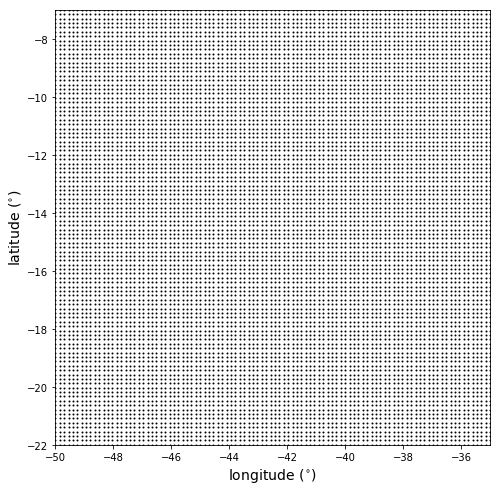

In [10]:
plt.figure(figsize=(10,8))
plt.axis('scaled')
plt.plot(longitude, latitude, 'k.', markersize=2)
plt.xlim(longitude_min, longitude_max)
plt.ylim(latitude_min, latitude_max)
plt.xlabel('longitude ($^{\circ}$)', fontsize=14)
plt.ylabel('latitude ($^{\circ}$)', fontsize=14)
plt.show()

### Transform the geodetic coordinates into topocentric Cartesian coordinates

In [11]:
# semimajor and semiminor axes of the reference elipsoid
a = normal_gravity.WGS84.a
b = normal_gravity.WGS84.b

In [12]:
# origin of the topocentric system
h_P = 0
latitude_P = 0.5*(latitude_max + latitude_min)
longitude_P = 0.5*(longitude_max + longitude_min)

In [13]:
# Cartesian coordinates of the observations
x, y, z = co.GGC2TCC(h_P, latitude_P, longitude_P,
                     h, latitude, longitude, a, b)

In [14]:
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)

In [15]:
# Cartesian coordinates of the reference elipsoid surface
xe, ye, ze = co.GGC2TCC(h_P, latitude_P, longitude_P, 
                        elipsoid_surface, latitude, longitude, a, b)

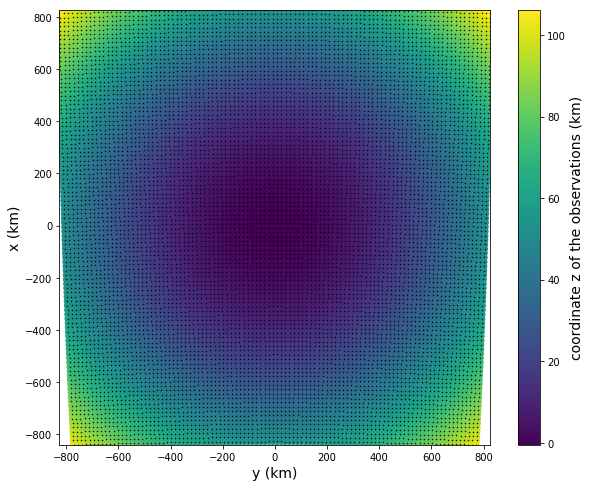

In [16]:
plt.figure(figsize=(10,8))
plt.axis('scaled')
plt.scatter(0.001*y, 0.001*x, c=0.001*z, marker='o', cmap=plt.get_cmap('viridis'))
cb = plt.colorbar()
cb.set_label('coordinate z of the observations (km)', fontsize=14)
plt.plot(0.001*y, 0.001*x, 'k.', markersize=1)
plt.xlim(0.001*y_min, 0.001*y_max)
plt.ylim(0.001*x_min, 0.001*x_max)
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('x (km)', fontsize=14)
plt.show()

### Create an anomalous mass distribution

In [17]:
# model formed by three right prisms
model = [mesher.Prism(-600000, 0, -400000, -200000, 2000, 8000, {'density': 1000}),
         mesher.Prism(200000, 300000, -600000, 200000, 1000, 9000, {'density': -900}),
         mesher.Prism(-600000, -400000, 200000, 400000, 3000, 7000, {'density': 1300})]

### Compute the synthetic Geoid

In [18]:
gamma_e = normal_gravity.gamma_somigliana(latitude, normal_gravity.WGS84)

In [ ]:
hP_linha = []

for 